In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # linear algebra
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monkeylearn-pfizer-sentiment-analysis-images/Positive.png
/kaggle/input/monkeylearn-pfizer-sentiment-analysis-images/Overall.png
/kaggle/input/monkeylearn-pfizer-sentiment-analysis-images/Negative.png
/kaggle/input/monkeylearn-pfizer-sentiment-analysis-images/Neutral.png
/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv
/kaggle/input/monkeylearn-pfizer-vaccine-300-tweets/processed_batch 300 tweets.csv


# A Sentiment Analysis of Pfizer Vaccine via Tweets

1. Introduction
2. Data analysis;
3. Method for sentiment analysis;
4. Results;
5. Comments and conclusions.



# 1. Introduction
Here we will perform a sentiment analysis on the Pfizer vaccine tweets.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import os
!ls ../input/monkeylearn-pfizer-sentiment-analysis-images

Negative.png  Neutral.png  Overall.png	Positive.png


In [3]:
pfizerTweets_df = pd.read_csv('/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv')

In [4]:
pfizerTweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
pfizerTweets_df['is_retweet'].value_counts()

False    3683
Name: is_retweet, dtype: int64

In [6]:
There are no retweets.

SyntaxError: invalid syntax (<ipython-input-6-eb9c686cc983>, line 1)

In [7]:
pfizerTweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3683 non-null   int64 
 1   user_name         3683 non-null   object
 2   user_location     2911 non-null   object
 3   user_description  3458 non-null   object
 4   user_created      3683 non-null   object
 5   user_followers    3683 non-null   int64 
 6   user_friends      3683 non-null   int64 
 7   user_favourites   3683 non-null   int64 
 8   user_verified     3683 non-null   bool  
 9   date              3683 non-null   object
 10  text              3683 non-null   object
 11  hashtags          2726 non-null   object
 12  source            3682 non-null   object
 13  retweets          3683 non-null   int64 
 14  favorites         3683 non-null   int64 
 15  is_retweet        3683 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 410.1+ KB


I will remove columns that I don't need for the sentiment analysis such as:
1. user_description
2. user_created
3. user_followers
4. user_friends
5. user_favourites
6. user_verified
7. hashtags
8. retweets
9. favorites
10. is_retweet

In [8]:
pfizerTweets_df = pfizerTweets_df.drop(['user_name',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'hashtags',
 'retweets',
 'favorites',
 'is_retweet'],1)

In [9]:
list(pfizerTweets_df)

['id', 'user_location', 'date', 'text', 'source']

Check for duplicate tweets

In [10]:
sum(pfizerTweets_df['id'].duplicated())

0

In [11]:
sum(pfizerTweets_df['text'].duplicated())

2

Change the column text and source to text format

In [12]:
pfizerTweets_df["source"] = pfizerTweets_df["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')
pfizerTweets_df["text"] = pfizerTweets_df["text"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [13]:
pfizerTweets_df['date'].dtypes

dtype('O')

In [14]:
pfizerTweets_df['date'] = pd.to_datetime(pfizerTweets_df['date'])

In [15]:
pfizerTweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             3683 non-null   int64         
 1   user_location  2911 non-null   object        
 2   date           3683 non-null   datetime64[ns]
 3   text           3683 non-null   object        
 4   source         3682 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 144.0+ KB


The date column was converted to datetime64 format instead of an object

# 2. Data analysis;


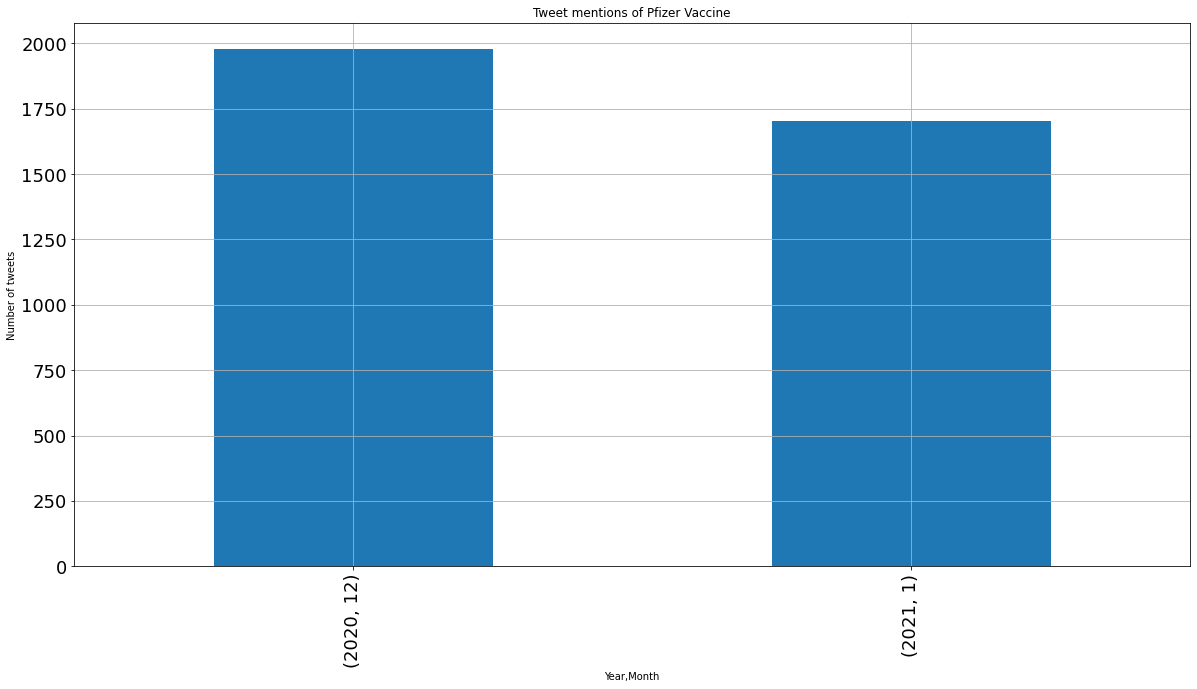

In [16]:
da_df = pfizerTweets_df.id.groupby([pfizerTweets_df["date"].rename('Year').dt.year, pfizerTweets_df["date"].rename('Month').dt.month]).count()
da_df.plot(kind = 'bar', figsize=(20,10), grid = True, fontsize = 18 , x = 'date', title = 'Tweet mentions of Pfizer Vaccine').set_ylabel('Number of tweets')
ax = plt.gca()
plt.show();

From this graph we can see that the data contains tweets from December 2020 and January 2021.

# 3. Method for sentiment analysis;

For the sentiment analysis I used MonkeyLearn. https://monkeylearn.com/

now we will export this dataframe.

In [17]:
pfizerTweets_df.to_csv('cleaned_pfizer_vaccine_tweets.csv', index = False, encoding = 'utf-8')

## The Sentiment analysis was done using MonkeyLearn.
82 texts have been used to train the model.

The result can be found in the ../input/monkeylearn-pfizer-vaccine-300-tweets/processed_batch 300 tweets.csv

This is the overall Confidence level of the model.

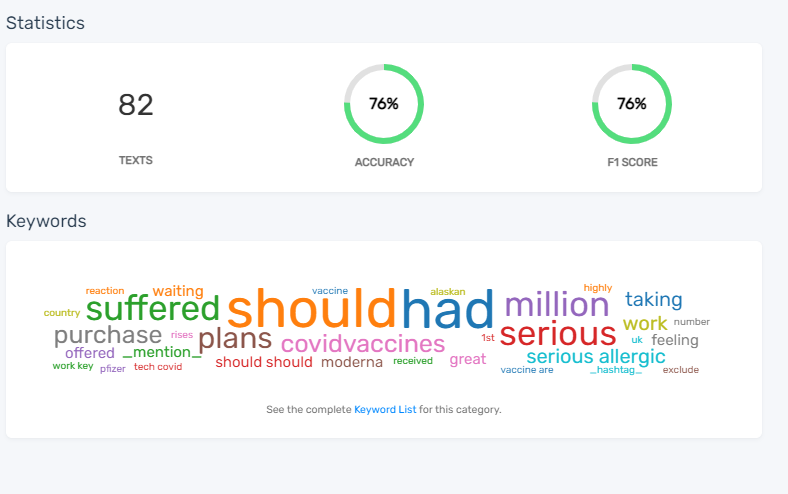

In [18]:
Image("../input/monkeylearn-pfizer-sentiment-analysis-images/Overall.png")

monkeylearn-pfizer-sentiment-analysis-images

This is the Negative Confidence level of the model.

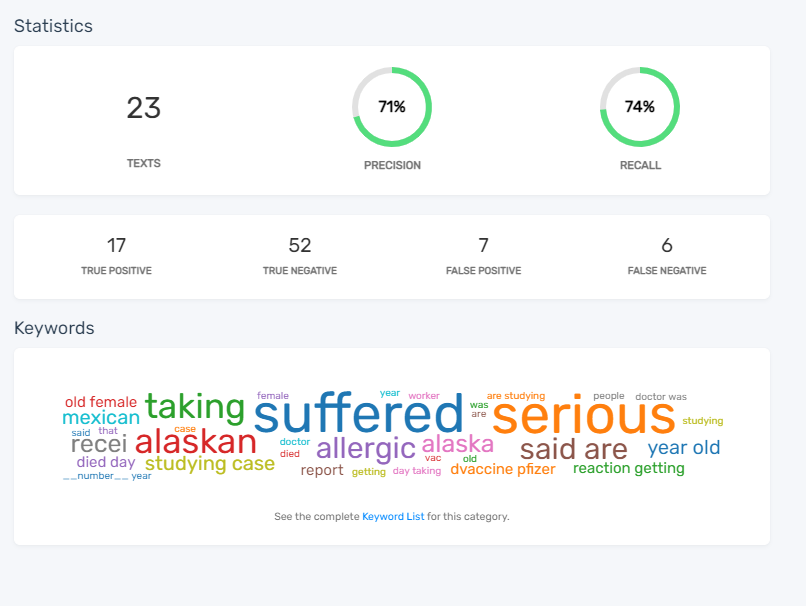

In [19]:
Image("../input/monkeylearn-pfizer-sentiment-analysis-images/Negative.png")

This is the Neutral Confidence level of the model.

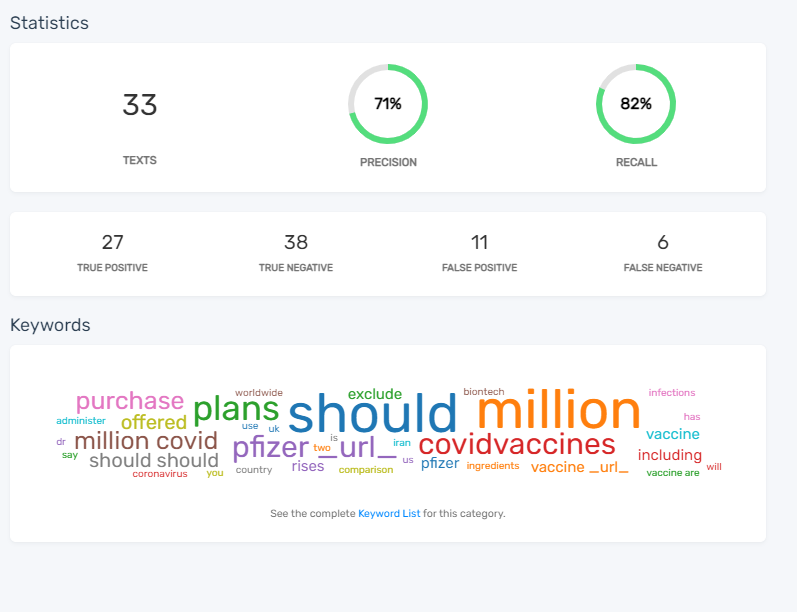

In [20]:
Image("../input/monkeylearn-pfizer-sentiment-analysis-images/Neutral.png")

This is the Positive Confidence level of the model.

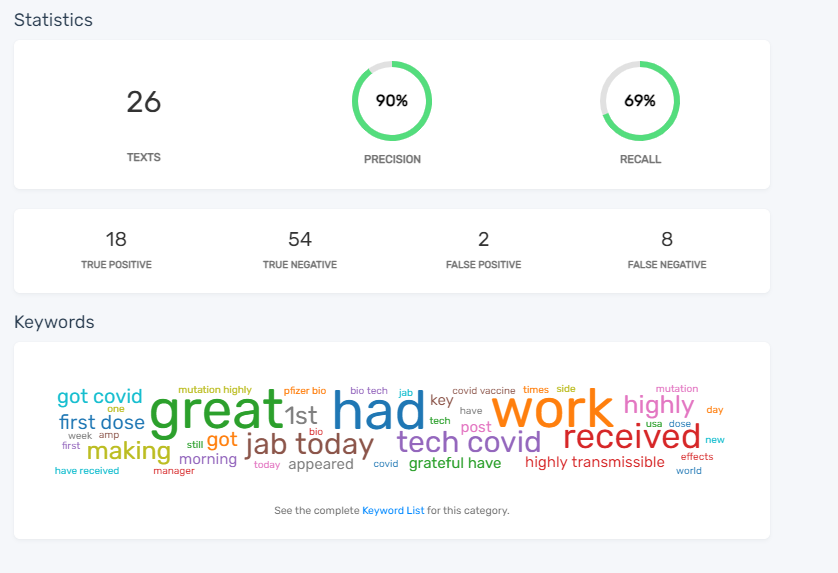

In [21]:
Image("../input/monkeylearn-pfizer-sentiment-analysis-images/Positive.png")

# 4. Results;
These are the results.

In [22]:
sentiment_df = pd.read_csv('../input/monkeylearn-pfizer-vaccine-300-tweets/processed_batch 300 tweets.csv')

In [23]:
no_tweets =  len(sentiment_df.query('Classification == "Negative"')) + len(sentiment_df.query('Classification == "Neutral"')) + len(sentiment_df.query('Classification == "Positive"'))
no_tweets

300

<Figure size 432x288 with 0 Axes>

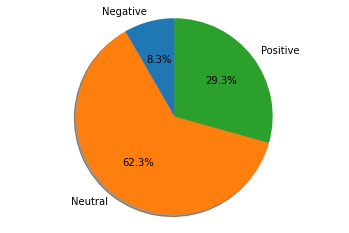

In [24]:
labels = 'Negative', 'Neutral','Positive'
sizes = [(len(sentiment_df.query('Classification == "Negative"'))/no_tweets),(len(sentiment_df.query('Classification == "Neutral"'))/no_tweets),(len(sentiment_df.query('Classification == "Positive"'))/no_tweets)]
plt.suptitle('Percentage of tweets', fontsize=24)
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As shown from the pie chart most of the tweets were neutral at 62.3%.
Positive at 29.3% and Negative at 8.3%

In [25]:
sentiment_df.user_location = sentiment_df.user_location.str.replace('^[a-z]+','None')
sentiment_df ['user_location'] = sentiment_df ['user_location'].astype(str)
sentiment_relation["user_location"] = sentiment_relation["user_location"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')
sentiment_df.info()

NameError: name 'sentiment_relation' is not defined

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127759 missing from current font.
  fon

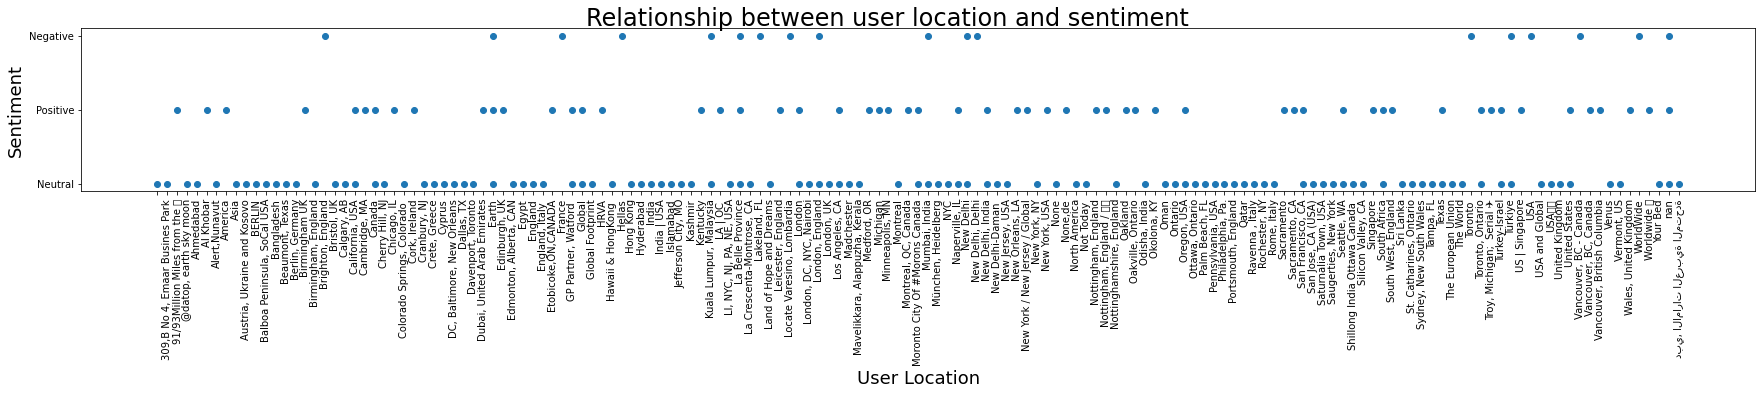

In [26]:
sentiment_relation = sentiment_df.groupby(['user_location', 'Classification'], as_index=False).count()
sentiment_relation = sentiment_relation[['user_location', 'Classification']]
plt.figure(figsize=[30,3])
plt.suptitle('Relationship between user location and sentiment ', fontsize=24)
plt.xlabel('User Location', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Sentiment', fontsize=18)
plt.scatter(sentiment_relation.user_location, sentiment_relation.Classification);

Here the relationship between the user location and sentiment is displayed.

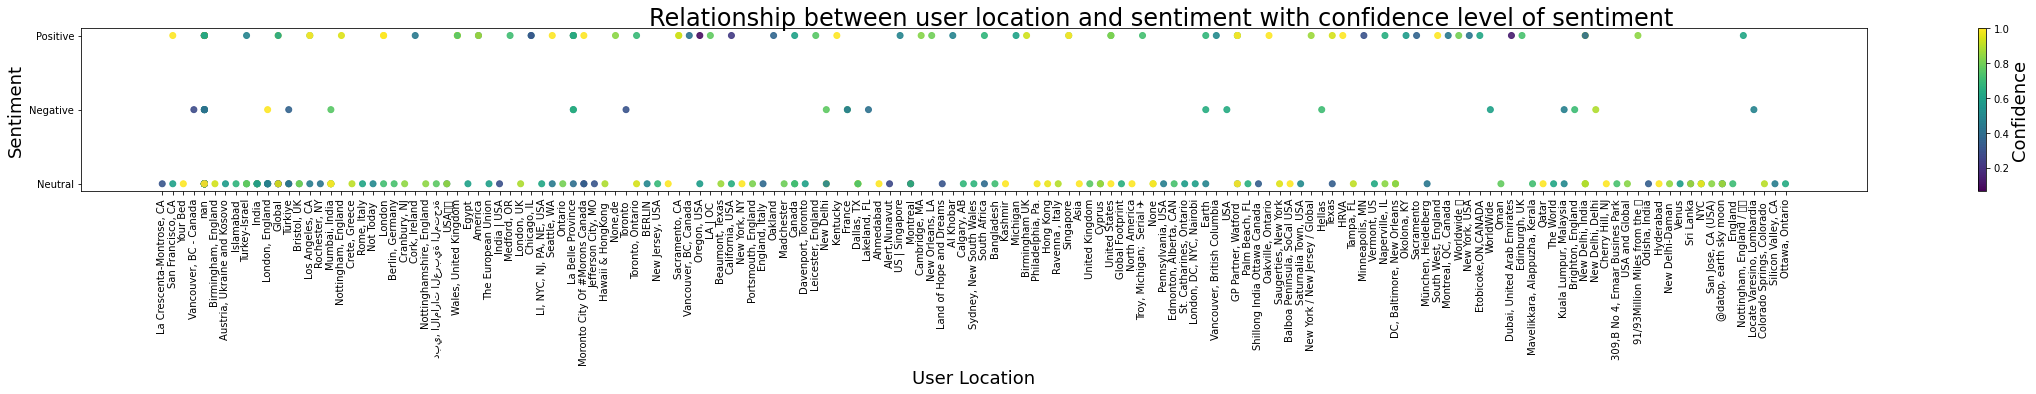

In [27]:
def sentiment_confidence(x):
    confidence_max, confidence_min = 1, 0
    if(x>confidence_max): 
        x=confidence_max
    elif(x<confidence_min):
        x=confidence_min
    return x
sentiment_df.Confidence = sentiment_df.Confidence.apply(sentiment_confidence)
plt.figure(figsize=[40,3])
plt.suptitle('Relationship between user location and sentiment with confidence level of sentiment', fontsize=24)
plt.xlabel('User Location', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Sentiment', fontsize=18)
plt.scatter(x=sentiment_df.user_location, y=sentiment_df.Classification, alpha=.9, c=sentiment_df.Confidence)
colorBar = plt.colorbar();
colorBar.set_label("Confidence",fontsize=18, labelpad=+2)
plt.show()

This graph shows the sentiment of the tweets including the confidence level of each sentiment.


# 5. Comments and conclusions.

Most of the tweets analyzed were neutral as they were reporting facts and have neither a positive or negative sentiment.
The sentiment analysis was done for only 300 tweets as it is a limit by my acount at MonkeyLearn.